

**GRUPO <7>**

Pilar Arias, Álvaro García Cid, Yedra Martín, Amaya Sarasa


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [2]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Analizamos los datos

Comprobamos las dimensiones de los datos proporcionados:

In [3]:
print(train_images.shape)

(60000, 28, 28)


Efectivamente, encontramos 60000 imágenes para el entrenamiento, de 28*28 píxeles. Más adelante deberemos cambiar las dimensiones de las imágenes, para así poderlas entrar correctamente a la primera capa de la red neuronal. 

Comprobamos la longitud de las etiquetas para comprobar que están todas, tanto en las fotos de entrenamiento como en las del test:

In [4]:
len(train_labels)


60000

In [5]:
len(test_labels)

10000

Es correcto, ya que para cada imagen, se tiene asociado una etiqueta como se deseaba.

A continuación, probamos a ver cómo se vería representada la imagen número 999:

In [6]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(test_images[1000]))

[[  0   0   1   0   0   0   0   0  84  80   0   0   0   0   0   0   0   0   0  13  97   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  48 161 189 197   0   0   0   0   0   1   0   0   0 178 195 161  79   0   0   0   0   0]
 [  0   0   0   0   0  66 210 202 201 193 106   0   0   1   1   0   0   0 134 195 179 165 221  74   0   0   0   0]
 [  0   0   0   0   3 196 178 187 186 166 186 132   0   0   0   0   0 104 182 153 192 183 179 182  27   0   0   0]
 [  0   0   1   0 136 204 184 106 169 201 184 208 186  80  50 105 206 213 191 199 205 160 157 170 163   0   0   0]
 [  0   0   0   0 188 173 200 199 231 171 162 209 136 244 174 241 179 147 179 130 215 173 134 189 176   6   0   0]
 [  0   0   0  35 186 195 183 126 184 160 165 160 148 174 152 157 144 179 162 171 156 186 132 122 201  76   0   0]
 [  0   0   0 114 186 184 202 196 197 131 209 180 202 167 144 221 174 213 171 154 227 176 127 193 189 193   0   0]
 [  0   0   0 223 183 165 166 173 200 163 161 200 149 204 124 184 165 157 182 11

Se puede asemejar a una camiseta, y efectivamente, comprobando con la etiqueta que se proporciona, se está representando de manera correcta.

In [7]:
test_labels[1000]


0

Probamos otra manera de representar la imagen. 

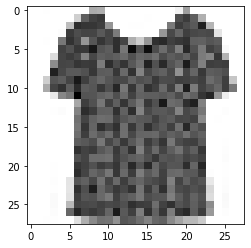

In [8]:
import matplotlib.pyplot as plt
digit = test_images[1000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

##Preparación de datos


In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[2]))

60000
(60000, 784)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.09 0.46 0.09 0.   0.   0.   0.   0.   0.19 0.35 0.02 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.39 0.83 0.8  0.73 0.7  0.68 0.73 0.76 0.87 0.56 0.33 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.33 0.3  0.78 0.88 0.97 1.   0.93 0.89 0.62 0.27 0.31 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.36 0.27 0.36 0.79 0.85 0.88 0.82 0.62 0.24 0.36 0.28 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.31 0.35 0.24 0.23 0.34 0.42 0.29 0.22 0.3  0.38 0.29 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.29 0.35 0.31 0.31 0.26 0.25 0.29 0.33 0.31 0.38 0.28 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.3  0.35 0.3  0.31 0.33 0.33 0.33 0.33 0.32 0.37 0.3  0.   0.   0.   0.   0.   0.   0.   0.
 

In [10]:
def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_test_labels)


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## CASO 1

Procedemos 

In [12]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


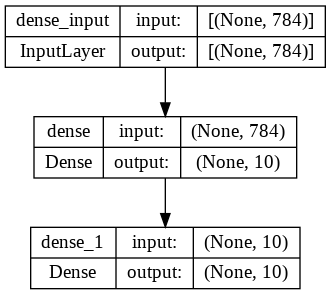

In [13]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

In [14]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [15]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.3714 - accuracy: 0.5559
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7923 - accuracy: 0.7288
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6827 - accuracy: 0.7690
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6249 - accuracy: 0.7898
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5876 - accuracy: 0.8022


In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax (predictions_array)
  if predicted_label== true_label:
    color = 'blue' 
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
 

Ejemplo de uso para ver la predicción de la 6ª figura de las imágenes de test.

## CASO 2

In [20]:
from keras import models
from keras import layers
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


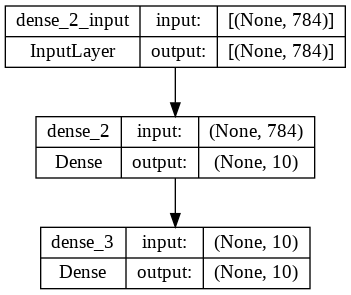

In [21]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network2, "my_first_model.png", show_shapes=True)

In [22]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [23]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network2.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.0967 - accuracy: 0.6110
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5754 - accuracy: 0.8077
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4979 - accuracy: 0.8298
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4664 - accuracy: 0.8400
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4482 - accuracy: 0.8462


## CASO 3

In [24]:
from keras import models
from keras import layers
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))
network3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


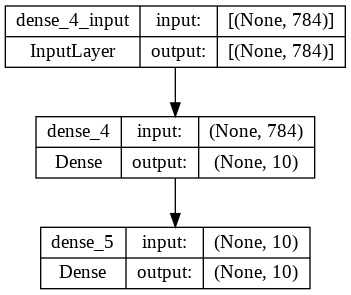

In [25]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network3, "my_first_model.png", show_shapes=True)

In [26]:
network3.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [27]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network3.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.0740 - accuracy: 0.3511
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.7673 - accuracy: 0.5304
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.5711 - accuracy: 0.5940
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4221 - accuracy: 0.6222
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3065 - accuracy: 0.6371


## CASO 4

In [28]:
from keras import models
from keras import layers
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))
network4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


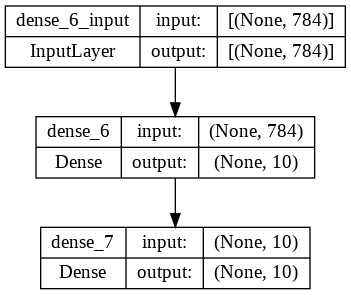

In [29]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network4, "my_first_model.png", show_shapes=True)

In [30]:
network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [31]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network4.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.4548 - accuracy: 0.6395
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8651 - accuracy: 0.7567
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6579 - accuracy: 0.7909
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5684 - accuracy: 0.8124
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5188 - accuracy: 0.8281


## CASO 5

In [32]:
from keras import models
from keras import layers
network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))
network5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


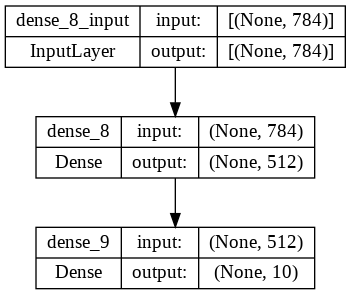

In [33]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network5, "my_first_model.png", show_shapes=True)

In [34]:
network5.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [35]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network5.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.0254 - accuracy: 0.6910
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6582 - accuracy: 0.7901
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5800 - accuracy: 0.8128
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5392 - accuracy: 0.8241
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5125 - accuracy: 0.8296


## CASO 6

In [36]:
from keras import models
from keras import layers
network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))
network6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


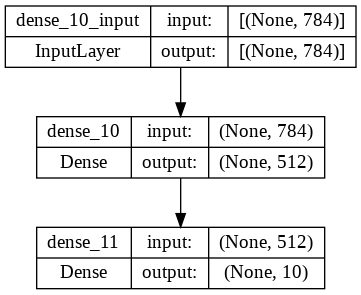

In [37]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network6, "my_first_model.png", show_shapes=True)

In [38]:
network6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [39]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network6.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5533 - accuracy: 0.8049
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3820 - accuracy: 0.8596
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3378 - accuracy: 0.8750
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3109 - accuracy: 0.8851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2938 - accuracy: 0.8911


## CASO 7

In [40]:
from keras import models
from keras import layers
network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))
network7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


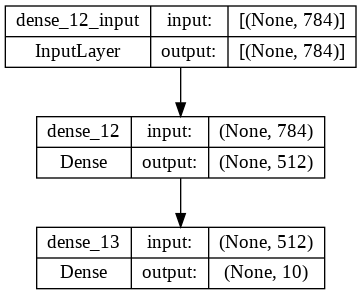

In [41]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network7, "my_first_model.png", show_shapes=True)

In [42]:
network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [43]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network7.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.7074 - accuracy: 0.5879
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 1.1244 - accuracy: 0.7126
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.9199 - accuracy: 0.7325
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.8193 - accuracy: 0.7448
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.7590 - accuracy: 0.7531


## CASO 8

In [44]:
from keras import models
from keras import layers
network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


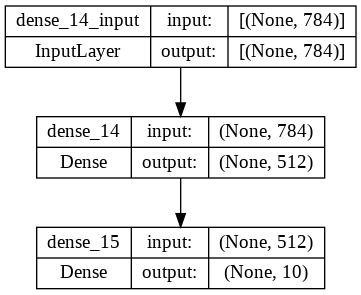

In [45]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network8, "my_first_model.png", show_shapes=True)

In [46]:
network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [47]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network8.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5872 - accuracy: 0.7928
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4269 - accuracy: 0.8450
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3852 - accuracy: 0.8603
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3589 - accuracy: 0.8685
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3383 - accuracy: 0.8755


In [48]:
predictions = network.predict(test_images)
predictions2 = network2.predict(test_images)
predictions3 = network3.predict(test_images)
predictions4 = network4.predict(test_images)
predictions5 = network5.predict(test_images)
predictions6 = network6.predict(test_images)
predictions7 = network7.predict(test_images)
predictions8 = network8.predict(test_images)

313/313 [==============================] - 1s 2ms/step


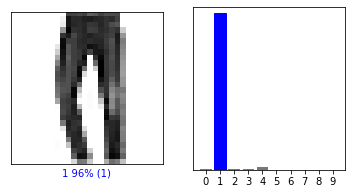

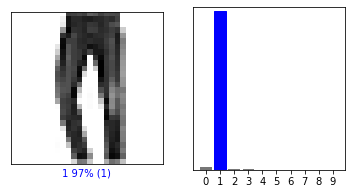

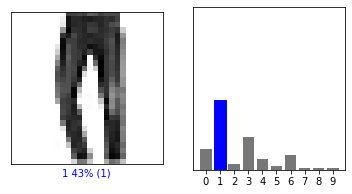

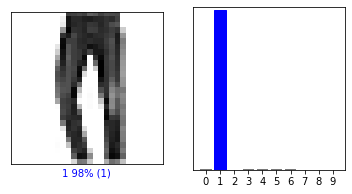

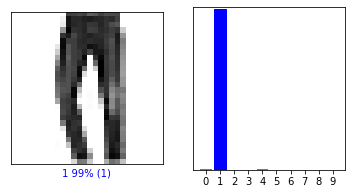

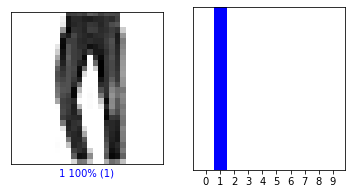

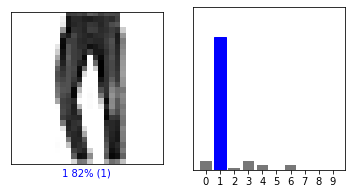

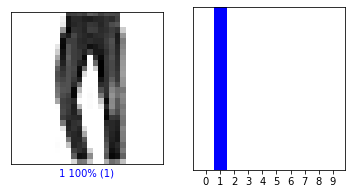

In [50]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5], test_labels)
plt.show()
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions2[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions2[5], test_labels)
plt.show()
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions3[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions3[5], test_labels)
plt.show()
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions4[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions4[5], test_labels)
plt.show()
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions5[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions5[5], test_labels)
plt.show()
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions6[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions6[5], test_labels)
plt.show()
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions7[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions7[5], test_labels)
plt.show()
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions8[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions8[5], test_labels)
plt.show()